In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

Tạo dữ liệu rời rạc

In [ ]:
# 1. ĐỊNH NGHĨA HÀM BẬC 2 (Đây là "bí mật" chúng ta muốn mô hình tìm ra)
# y = 2x^2 + 3x + 5
a = 2
b = 3
c = 5

# 2. TẠO DỮ LIỆU
num_points = 100
np.random.seed(42) # Để kết quả luôn giống nhau mỗi lần chạy

# Tạo 100 điểm x ngẫu nhiên trong khoảng -10 đến 10
# .reshape(-1, 1) để biến nó thành cột [100, 1]
x_train_np = np.random.uniform(-10, 10, num_points).reshape(-1, 1)

# Tính y "hoàn hảo" theo phương trình
y_true_np = a * (x_train_np**2) + b * x_train_np + c

# Thêm "nhiễu" (noise) vào y để làm nó thực tế hơn
# Tạo nhiễu ngẫu nhiên có trung bình 0 và độ lệch chuẩn 10
noise = np.random.normal(0, 10, num_points).reshape(-1, 1)
y_train_np = y_true_np + noise




Vẽ các điểm dữ liệu này (optional)

Hình dạng của X: (100, 1)
Hình dạng của Y: (100, 1)


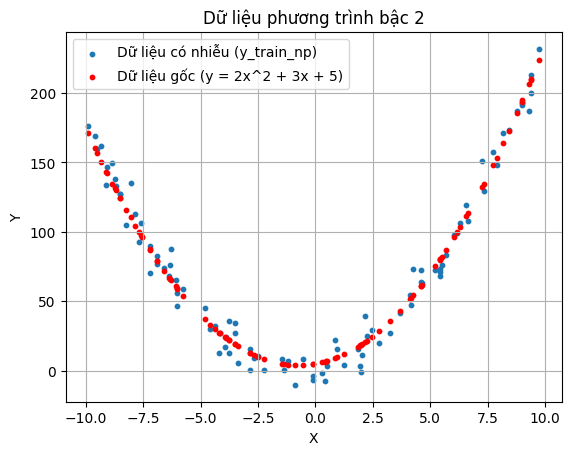

In [ ]:
# 3. VẼ BIỂU ĐỒ ĐỂ XEM DỮ LIỆU
print(f"Hình dạng của X: {x_train_np.shape}") # Sẽ là (100, 1)
print(f"Hình dạng của Y: {y_train_np.shape}") # Sẽ là (100, 1)

plt.scatter(x_train_np, y_train_np, label='Dữ liệu có nhiễu (y_train_np)', s=10)
plt.scatter(x_train_np, y_true_np, label='Dữ liệu gốc (y = 2x^2 + 3x + 5)', s=10, c='red')
plt.title("Dữ liệu phương trình bậc 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=[20, 20, 5], activation='tanh'): # nếu không truyền activation, thì mặc định là tanh

        super(MyNeuralNetwork, self).__init__() # tạm thời không hiểu, chỉ biết nó khởi tạo cái gì đó và cần thiết phải đánh ra

        layers = [] # tạo vùng chứa rỗng
        layers.append(nn.Linear(input_size, hidden_size[0]))
        # append tức là thêm phần tử mới vào layers;

        # nn.Linear chỉ là viết tắt của phương trình wx + b của neural

############### Nhận diện hàm activation ################
        if activation == 'relu':
            layers.append(nn.ReLU())
        elif activation == 'sigmoid':
            layers.append(nn.Sigmoid())
        elif activation == 'tanh':
            layers.append(nn.Tanh())
        else:
            layers.append(nn.Softplus())

        for i in range(len(hidden_size) - 1):
            layers.append(nn.Linear(hidden_size[i], hidden_size[i+1]))
            if activation == 'relu':
                layers.append(nn.ReLU())
            elif activation == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation == 'tanh':
                layers.append(nn.Tanh())
            else:
                layers.append(nn.Softplus())

        layers.append(nn.Linear(hidden_size[-1], output_size)) # Dấu [-1] trong Python nghĩa là phần tử cuối cùng của danh sách.

        self.network = nn.Sequential(*layers) # *layers có nghĩa là mở danh sách ra, truyền từng phần tử riêng lẻ vào hàm.

    def forward(self, x):
        return self.network(x)

# Tự động tính đạo hàm (Auto-diff)

In [ ]:
# Auto differential
def auto_grad(u, x, order=1):
    if order == 1:#n nếu đạo hàm bậc 1
        return torch.autograd.grad(u, x, torch.ones_like(u), retain_graph=True, create_graph=True)[0] # đạo hàm u theo x
    return auto_grad(auto_grad(u, x), x, order - 1) # đạo hàm bậc cao hơn, là bậc 2

Tính phần dư

In [ ]:
def loss_function(y_true, y_pred):
    residuals = y_true - y_pred
    return torch.mean(residuals ** 2)

Training loop

In [ ]:
# Đây là "trái tim" của quá trình học.
num_epochs = 1000 # Số lần "học" đi học lại toàn bộ dữ liệu
model= MyNeuralNetwork(input_size = 1, output_size = 1, hidden_size=[20, 60, 20], activation='relu')

# lấy parameter đó để tối ưu
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # --- A. Forwarpass (Dự đoán) ---
    # chuyển về dạng tensor
    # Removed the list wrapper `[]` to prevent adding an extra dimension.
    x_train = torch.tensor(x_train_np, dtype=torch.float32)
    y_train = torch.tensor(y_train_np, dtype=torch.float32)
    # Đưa dữ liệu huấn luyện vào mô hình
    y_pred = model(x_train)

    # --- B. Calculate Loss (Tính độ sai) ---
    # So sánh dự đoán (y_pred) với kết quả thật (y_train)
    loss = loss_function(y_train, y_pred)

    # --- C. Backward pass (Tính đạo hàm) ---
    # 1. Xóa đạo hàm cũ (rất quan trọng)
    optimizer.zero_grad()
    # 2. Tự động tính đạo hàm của loss theo TẤT CẢ tham số
    loss.backward()

    # --- D. Update Model (Cập nhật tham số) ---
    # Dùng thuật toán tối ưu để cập nhật các trọng số W, b
    optimizer.step()

    # In ra tiến độ
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 2032.8704
Epoch [200/1000], Loss: 561.6629
Epoch [300/1000], Loss: 453.9762
Epoch [400/1000], Loss: 334.8658
Epoch [500/1000], Loss: 218.1588
Epoch [600/1000], Loss: 157.5867
Epoch [700/1000], Loss: 132.4483
Epoch [800/1000], Loss: 108.3096
Epoch [900/1000], Loss: 89.5029
Epoch [1000/1000], Loss: 80.7867


#Đánh giá mô hình

In [ ]:
model.eval() # Chuyển mô hình sang chế độ "đánh giá"
with torch.no_grad(): # Không cần tính đạo hàm nữa
    loss_eval = loss_function(y_train, y_pred)
    print(f'Loss trên tập kiểm thử: {loss_eval.item():.4f}')

Loss trên tập kiểm thử: 80.7867


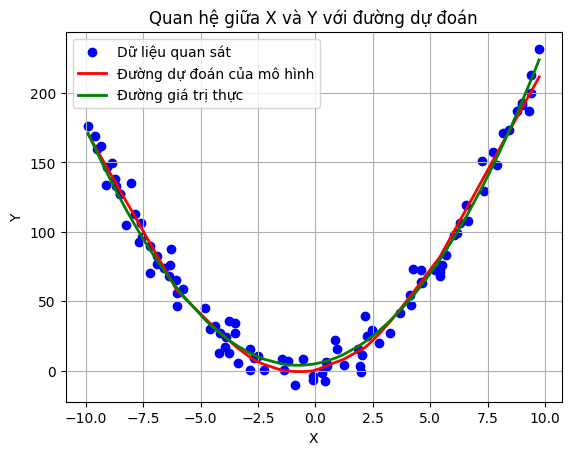

In [ ]:
# Chuyển đổi dữ liệu và dự đoán sang định dạng numpy để vẽ

# Tạo một bản sao của x_train_np và sắp xếp x_train_np theo thứ tự tăng dần
sorted_indices = np.argsort(x_train_np.flatten())
x_train_sorted_np = x_train_np[sorted_indices]

# Chuyển đổi x_train_sorted_np thành tensor để đưa vào model
x_train_sorted_tensor = torch.tensor(x_train_sorted_np, dtype=torch.float32)

# Lấy dự đoán từ mô hình trên dữ liệu x đã sắp xếp
model.eval() # Chuyển mô hình sang chế độ đánh giá
with torch.no_grad(): # Không cần tính đạo hàm khi chỉ dự đoán
    y_pred_sorted_tensor = model(x_train_sorted_tensor)
y_pred_sorted_np = y_pred_sorted_tensor.detach().numpy()

# Tính y_true cho các giá trị x đã sắp xếp để vẽ đường cong thật
y_true_sorted_np = a * (x_train_sorted_np**2) + b * x_train_sorted_np + c

# Vẽ scatter plot các điểm dữ liệu gốc (không cần sắp xếp để hiển thị phân bố thực tế)
plt.scatter(x_train_np, y_train_np, color='blue', label='Dữ liệu quan sát')

# Vẽ đường dự đoán của mô hình (dùng dữ liệu x đã sắp xếp và y_pred tương ứng)
plt.plot(x_train_sorted_np, y_pred_sorted_np, color='red', linestyle='-', linewidth=2, label='Đường dự đoán của mô hình')

# Vẽ đường giá trị thực (True value)
plt.plot(x_train_sorted_np, y_true_sorted_np, color='green', linestyle='-', linewidth=2, label='Đường giá trị thực')

# Thêm nhãn và tiêu đề
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Quan hệ giữa X và Y với đường dự đoán")
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [ ]:
print("Các tham số cuối cùng của mô hình:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Tên lớp: {name}, Giá trị: {param.data.numpy()}")

Các tham số cuối cùng của mô hình:
Tên lớp: network.0.weight, Giá trị: [[ 0.8929903 ]
 [-0.37388763]
 [-0.8295824 ]
 [-0.977586  ]
 [-0.3297168 ]
 [-0.55200034]
 [-1.0712271 ]
 [-0.00582883]
 [ 0.42893168]
 [ 1.1804829 ]
 [ 0.36766383]
 [-0.40586746]
 [ 0.71717256]
 [-0.19573252]
 [-0.51742995]
 [-0.75797755]
 [-0.15869625]
 [ 0.48008937]
 [-0.39857703]
 [-0.80589664]]
Tên lớp: network.0.bias, Giá trị: [ 0.15031824 -1.0137966  -1.178827   -1.016939   -0.8344549   0.75879747
  0.5513395   1.4072013  -0.52035725 -1.1779832  -0.36684683  0.59513855
  0.42169645 -0.86554915  0.9443301  -0.03571481 -0.95586467 -1.1061367
 -1.3479503   0.6059605 ]
Tên lớp: network.2.weight, Giá trị: [[ 0.32434642  0.11121181  0.36896127 ...  0.03711015  0.3992708
  -0.02949809]
 [ 0.25236407  0.15771481  0.09099839 ...  0.42962518  0.14771505
   0.01651651]
 [-0.42179152 -0.00779652  0.35370088 ... -0.20149258 -0.01163989
   0.05685925]
 ...
 [ 0.08982868 -0.09833483  0.15433677 ...  0.11744786  0.07591628
 